In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

In [5]:
df = pd.read_csv(r"C:\Users\AD\Downloads\medical_insurance_dataset.csv")
df.head()

,19,1,27.9,0,1.1,3,16884.924
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160


In [7]:
#Add the headers to the dataframe, as mentioned in the project scenario.
headers = ["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]
df.columns = headers
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160


In [9]:
#replace the '?' entries with 'NaN' values.
df.replace('?', np.nan, inplace = True)

In [11]:
#Data Wrangling
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2767 non-null   object 
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2764 non-null   object 
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [13]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

age
age
False    2767
True        4
Name: count, dtype: int64

gender
gender
False    2771
Name: count, dtype: int64

bmi
bmi
False    2771
Name: count, dtype: int64

no_of_children
no_of_children
False    2771
Name: count, dtype: int64

smoker
smoker
False    2764
True        7
Name: count, dtype: int64

region
region
False    2771
Name: count, dtype: int64

charges
charges
False    2771
Name: count, dtype: int64



In [15]:
# smoker is a categorical attribute, replace with most frequent entry
is_smoker = df['smoker'].value_counts().idxmax()
df["smoker"].replace(np.nan, is_smoker, inplace=True)

# age is a continuous variable, replace with mean age
mean_age = df['age'].astype('float').mean(axis=0)
df["age"].replace(np.nan, mean_age, inplace=True)

# Update data types
df[["age","smoker"]] = df[["age","smoker"]].astype("int")

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2771 non-null   int32  
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2771 non-null   int32  
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int32(2), int64(3)
memory usage: 130.0 KB
None


C:\Users\AD\AppData\Local\Temp\ipykernel_11072\863333469.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["smoker"].replace(np.nan, is_smoker, inplace=True)
C:\Users\AD\AppData\Local\Temp\ipykernel_11072\863333469.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [17]:
#Update the charges column such that all values are rounded to nearest 2 decimal places
df[["charges"]] = np.round(df[["charges"]],2)

(0.0, 66902.85800000001)

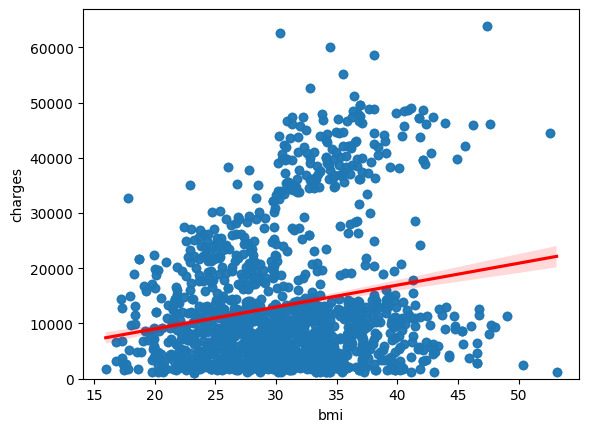

In [19]:
#Exploratory Data Analysis (EDA)
#Implement the regression plot for [charges] with respect to [bmi]
sns.regplot(x = 'bmi', y = 'charges', data = df, line_kws ={'color':'red'})
plt.ylim(0,)

<Axes: xlabel='smoker', ylabel='charges'>

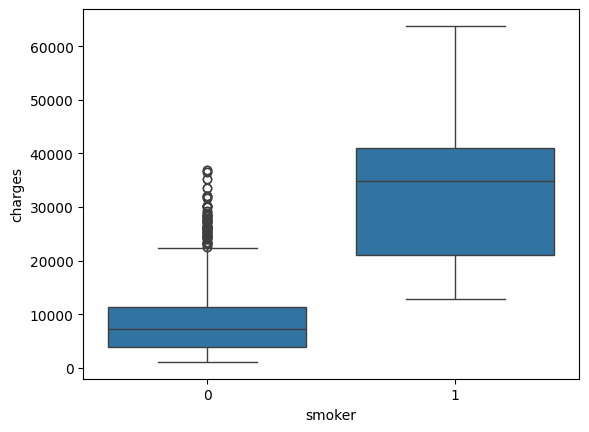

In [21]:
#Implement the box plot for charges with respect to smoker
sns.boxplot(x="smoker", y="charges", data=df)

In [23]:
#correlation matrix for the dataset
df.corr()

,age,gender,bmi,no_of_children,smoker,region,charges
age,1.000000,-0.026584,0.112859,0.037126,-0.022290,-0.006969,0.298892
gender,-0.026584,1.000000,0.042766,0.015693,0.083125,0.022360,0.062959
bmi,0.112859,0.042766,1.000000,-0.001642,0.011824,0.271200,0.199906
no_of_children,0.037126,0.015693,-0.001642,1.000000,0.007016,-0.025594,0.066551
smoker,-0.022290,0.083125,0.011824,0.007016,1.000000,0.053839,0.789141
region,-0.006969,0.022360,0.271200,-0.025594,0.053839,1.000000,0.054018
charges,0.298892,0.062959,0.199906,0.066551,0.789141,0.054018,1.000000


In [25]:
#Model Development
#using a linear regression model to predict the charges value, using the smoker attribute of the dataset.
X = df[['smoker']]
Y = df['charges']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.6227430402464125

In [27]:
#using a linear regression model to predict the charges value, using all attribute of the dataset.
Z = df[["age", "gender", "bmi", "no_of_children", "smoker", "region"]]
lm.fit(Z,Y)
lm.score(Z, Y)

0.7505888664568174

In [31]:
#Create a training pipeline uses StandardScaler(), PolynomialFeatures() and LinearRegression()
#to create a model that can predict the charges value using all the other attributes of the dataset
#improvement the performance.
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)
r2_score(Y,ypipe)

0.8453703095703826

In [33]:
#Model Refinement
#Split the data into training and testing subsets, assuming that 20% of the data will be reserved for testing
x_train, x_test, y_train, y_test = train_test_split(Z, Y, test_size=0.2, random_state=1)

In [35]:
#Initialize a Ridge regressor that used hyperparameter alpha = 0.1 Fit the model using training data data subset.
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)
r2_score(y_test,yhat)

0.7254198858412229

In [37]:
#Apply polynomial transformation to the training parameters with degree=2
#Use this transformed feature set to fit the same regression model, as above, using the training subset
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
r2_score(y_test,y_hat)

0.8208413195172467